<a href="https://colab.research.google.com/github/Schwarzam/NN-SPLUS/blob/master/Classification_with_pretraining_PNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [404]:
import os
import shutil
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import load_img, img_to_array, save_img
import matplotlib.image as mpimg

In [440]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Jul 29 09:08:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Load Files, 
=> create individual folders for each class


In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/trainsets/ClassGal.PNG.zip \
    -O /tmp/ClassGalaxiesPNG.zip

--2020-07-29 09:08:21--  https://storage.googleapis.com/trainsets/ClassGal.PNG.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255863120 (244M) [application/zip]
Saving to: ‘/tmp/ClassGalaxiesPNG.zip’

/tmp/ClassGalaxiesP 100%[===================>] 244.01M  58.5MB/s    in 4.2s    

2020-07-29 09:08:26 (58.5 MB/s) - ‘/tmp/ClassGalaxiesPNG.zip’ saved [255863120/255863120]



In [4]:
local_zip = '/tmp/ClassGalaxiesPNG.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [5]:
base_dir = '/tmp/Galaxies/'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training merger pictures
train_merger_dir = os.path.join(train_dir, 'Merger')
# Directory with our training spiral pictures
train_spiral_dir = os.path.join(train_dir, 'Spiral')
# Directory with our training elliptical pictures
train_elliptical_dir = os.path.join(train_dir, 'Elliptical')
# Directory with our training lenticular pictures
train_lenticular_dir = os.path.join(train_dir, 'Lenticular')

# Directory with our training merger pictures
test_merger_dir = os.path.join(test_dir, 'Merger')
# Directory with our training spiral pictures
test_spiral_dir = os.path.join(test_dir, 'Spiral')
# Directory with our training elliptical pictures
test_elliptical_dir = os.path.join(test_dir, 'Elliptical')
# Directory with our training lenticular pictures
test_lenticular_dir = os.path.join(test_dir, 'Lenticular')

# Directory with our validation merger pictures
validation_merger_dir = os.path.join(validation_dir, 'Merger')
# Directory with our validation spiral pictures
validation_spiral_dir = os.path.join(validation_dir, 'Spiral')
# Directory with our validation elliptical pictures
validation_elliptical_dir = os.path.join(validation_dir, 'Elliptical')
# Directory with our validation lenticular pictures
validation_lenticular_dir = os.path.join(validation_dir, 'Lenticular')

try:
  os.mkdir(train_dir)
  os.mkdir(test_dir)
  os.mkdir(validation_dir)
except:
  pass

try:
  os.mkdir(train_merger_dir)
  os.mkdir(train_spiral_dir)
  os.mkdir(train_elliptical_dir)
  os.mkdir(train_lenticular_dir)

  os.mkdir(test_merger_dir)
  os.mkdir(test_spiral_dir)
  os.mkdir(test_elliptical_dir)
  os.mkdir(test_lenticular_dir)

  os.mkdir(validation_merger_dir)
  os.mkdir(validation_spiral_dir)
  os.mkdir(validation_elliptical_dir)
  os.mkdir(validation_lenticular_dir)
except:
  pass

In [6]:
Merger_dir = os.path.join(base_dir, 'Merger')
Spiral_dir = os.path.join(base_dir, 'Spiral')
Elliptical_dir = os.path.join(base_dir, 'Elliptical')
Lenticular_dir = os.path.join(base_dir, 'Lenticular')

In [7]:
train_set = 0.7
test_set = 0.2
val_set = 0.1

In [8]:
source_dirs = [Merger_dir, Spiral_dir, Elliptical_dir, Lenticular_dir]

## create train dirs
for src in source_dirs:
  files = [f for f in listdir(src) if isfile(join(src, f))]

  if str(src).split('/')[3] == 'Merger':
    dest = train_merger_dir
  if str(src).split('/')[3] == 'Spiral':
    dest = train_spiral_dir
  if str(src).split('/')[3] == 'Elliptical':
    dest = train_elliptical_dir
  if str(src).split('/')[3] == 'Lenticular':
    dest = train_lenticular_dir

  files = files[0:int(train_set*len(files))]

  for filename in files:
    source = os.path.join(src, filename)
    dst = os.path.join(dest, filename)
    shutil.copyfile(source, dst)
    del source
    dst = dest

## create test dirs
for src in source_dirs:
  files = [f for f in listdir(src) if isfile(join(src, f))]

  if str(src).split('/')[3] == 'Merger':
    dest = test_merger_dir
  if str(src).split('/')[3] == 'Spiral':
    dest = test_spiral_dir
  if str(src).split('/')[3] == 'Elliptical':
    dest = test_elliptical_dir
  if str(src).split('/')[3] == 'Lenticular':
    dest = test_lenticular_dir

  files = files[int(train_set*len(files)):int(train_set*len(files)) + int(test_set*len(files))]

  for filename in files:
    source = os.path.join(src, filename)
    dst = os.path.join(dest, filename)
    shutil.copyfile(source, dst)
    del source
    dst = dest

## create validation dirs
for src in source_dirs:
  files = [f for f in listdir(src) if isfile(join(src, f))]

  if str(src).split('/')[3] == 'Merger':
    dest = validation_merger_dir
  if str(src).split('/')[3] == 'Spiral':
    dest = validation_spiral_dir
  if str(src).split('/')[3] == 'Elliptical':
    dest = validation_elliptical_dir
  if str(src).split('/')[3] == 'Lenticular':
    dest = validation_lenticular_dir

  files = files[int(train_set*len(files)) + int(test_set*len(files)):int(train_set*len(files)) + int(test_set*len(files)) + int(val_set*len(files))]

  for filename in files:
    source = os.path.join(src, filename)
    dst = os.path.join(dest, filename)
    shutil.copyfile(source, dst)
    del source
    dst = dest

### Image Generator 

In [188]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    shuffle=True,
    batch_size=10,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=10,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(256,256),
    class_mode='categorical',
    shuffle='False',
    batch_size=1
)

Found 1987 images belonging to 4 classes.
Found 568 images belonging to 4 classes.
Found 283 images belonging to 4 classes.


## Base Pre-train

In [55]:
# from keras.applications import VGG16

# conv_base = VGG16(weights='imagenet',
#                  include_top=False,
#                  input_shape=(256, 256, 3))

from keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

87916544/87910968 [==============================] - 4s 0us/step


In [ ]:
# conv_base.treinable = True

# set_trainable = False
# for layer in conv_base.layers:
#  if layer.name  == 'block5_conv1':
#    set_trainable = True
#  if set_trainable:
#    layer.trainable = True
#  else:
#    layer.trainable = False

In [ ]:
hist_arr = []

## Model

In [60]:
from keras import layers, models
from keras.layers import Conv2D

model = models.Sequential()

model.add(conv_base)

model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.GlobalAveragePooling2D(name='avg_pool'))
model.add(layers.Dense(4, activation='softmax'))

In [296]:
from keras import optimizers
lr = 1e-4
model.compile(loss = 'categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])


## **Function to save to Google Drive**

In [438]:
import time
from datetime import date

def mark_progress(history, lr):

  tempo = time.strftime("%H,%M")
  
  hoje = date.today()
  today1 = hoje.strftime("%B %d, %Y")
  today1 = today1.replace(" ", "")

  !mkdir '/content/drive/My Drive/TrainSets/Relatorios/'{today1}
  !mkdir '/content/drive/My Drive/TrainSets/Relatorios/'{today1}'/'{tempo}

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  today = [today1 for i in loss]

  epochs = range(1, len(acc)+1)
  lr = [lr for i in loss]

  list_of_tuples = list(zip(epochs, lr, acc, val_acc, loss, val_loss, today))

  ResultData = pd.DataFrame(list_of_tuples, columns = ['epochs', 'learning_rate','acc', 'val_acc', 'loss', 'val_loss', 'date'])
  
  plot = plot_model(model, to_file=f"/content/drive/My Drive/TrainSets/Relatorios/{today1}/{tempo}/ModelUsed.jpg",
        show_shapes=True,
        show_layer_names=True,
        rankdir="TB",
        dpi=96,)
  
  plt.plot(epochs, filtered, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'r', label='Validation Loss')
  plt.title('Training and validation Loss')
  plt.legend()
  
  plt.savefig(f"/content/drive/My Drive/TrainSets/Relatorios/{today1}/{tempo}/Validation.jpg")
  plt.clf()

  plt.plot(epochs, acc, 'ko', label='Training acc')
  plt.plot(epochs, val_acc, 'k', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  
  plt.savefig(f"/content/drive/My Drive/TrainSets/Relatorios/{today1}/{tempo}/Loss.jpg")
  plt.clf()
  
  ResultData.to_csv(f"/content/drive/My Drive/TrainSets/Relatorios/{today1}/{tempo}/Data.csv")
  model.save(f"/content/drive/My Drive/TrainSets/Relatorios/{today1}/{tempo}/Model")

## Train model


In [210]:
def train_model():
    history = model.fit(
        train_generator,
        epochs=15,
        validation_data=test_generator,
        shuffle=True,
        verbose=1)
    return history

In [ ]:
history = train_model()
hist_arr = np.append(hist_arr, history)

In [208]:
resultado = model.evaluate(validation_generator)
resultado

9/9 [==============================] - 1s 123ms/step


[10.419189453125, 0.7950530052185059]

In [ ]:
mark_progress(history, lr)

In [ ]:
epochs = range(1, len(acc)+1)

In [230]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

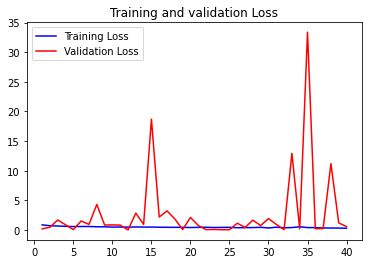

In [114]:
epochs = range(1, len(acc)+1)

plt.plot(epochs, filtered, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.savefig()
plt.show()

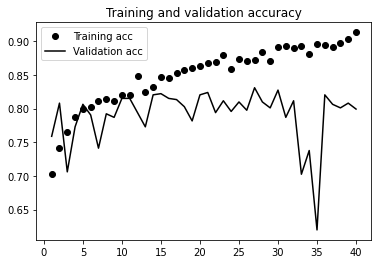

In [207]:
plt.plot(epochs, acc, 'ko', label='Training acc')
plt.plot(epochs, val_acc, 'k', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

## Testing with single image

In [441]:
from keras.preprocessing.image import load_img, img_to_array, save_img
img_path = '/content/drive/My Drive/TrainSets/Spiral_test/SPLUS.STRIPE82-0045.12712.griz.jpg'

image = load_img(img_path, target_size=(256,256))
img = img_to_array(image)
img = np.expand_dims(img, axis = 0)

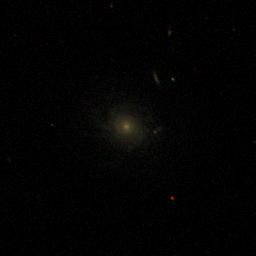

In [442]:
image

In [443]:
pred = model.predict_classes(img, verbose=1)

if pred[0] == 0:
    prediction = 'Elliptical'
if pred[0] == 1:
    prediction = 'Lenticular'
if pred[0] == 2:
    prediction = 'Merger'
if pred[0] == 3:
    prediction = 'Spiral'

print(prediction)

1/1 [==============================] - 2s 2s/step
Merger


## Testing with test_set, confusion matrix


In [560]:
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    x = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


    return x

In [561]:
def get_array_labels(array):
  Label_y_pred = []
  for x in array:
    if x == 0:
      Label_y_pred = np.append(Label_y_pred,'Elliptical')
    if x == 1:
      Label_y_pred = np.append(Label_y_pred,'Lenticular')
    if x == 2:
      Label_y_pred = np.append(Label_y_pred,'Merger')
    if x == 3:
      Label_y_pred = np.append(Label_y_pred,'Spiral')
  return Label_y_pred

Normalized confusion matrix
              precision    recall  f1-score   support

  Elliptical       0.19      0.15      0.17        80
  Lenticular       0.16      0.17      0.17        76
      Merger       0.20      0.18      0.19        51
      Spiral       0.28      0.36      0.32        76

    accuracy                           0.22       283
   macro avg       0.21      0.21      0.21       283
weighted avg       0.21      0.22      0.21       283



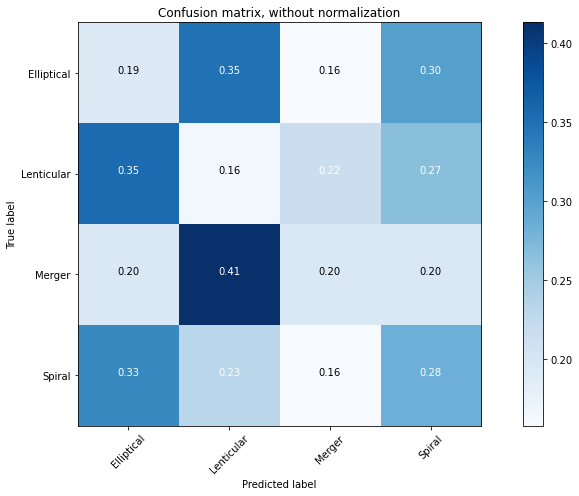

In [562]:
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

y_true = validation_generator.labels
Label_y_pred = get_array_labels(y_pred)
Label_y_true = get_array_labels(y_true)

cnf_matrix = confusion_matrix(Label_y_pred, Label_y_true, labels=['Elliptical', 'Lenticular', 'Merger', 'Spiral'])

fig = plot_confusion_matrix(cnf_matrix, classes=['Elliptical', 'Lenticular', 'Merger', 'Spiral'],
                      title='Confusion matrix, without normalization', normalize=True)

type(matrix)
target_names = ['Elliptical', 'Lenticular', 'Merger', 'Spiral']
print(classification_report(Label_y_true, Label_y_pred, target_names=target_names))
